In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) =datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
y_train[0]

array([6], dtype=uint8)

In [9]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train= y_train.reshape(-1,)

In [11]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test= y_test.reshape(-1,)

In [13]:
classes =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Text(0.5, 0, 'truck')

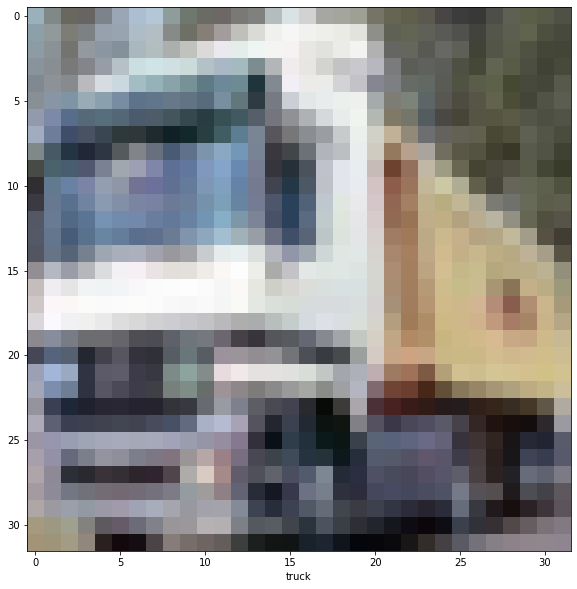

In [14]:
plt.figure(figsize= (10,10))
plt.imshow(x_train[1])
plt.xlabel(classes[y_train[1]])

In [15]:
x_train = x_train/255

In [16]:
x_test = x_test/255

In [17]:
ann = models.Sequential()

In [18]:
ann.add(layers.Flatten(input_shape=(32,32,3)))

In [19]:
ann.add(layers.Dense(300,activation='relu'))
ann.add(layers.Dense(100,activation='relu'))
ann.add(layers.Dense(10,activation='softmax'))

In [20]:
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 33ms/step - loss: 1.8819 - accuracy: 0.32670s - l
Epoch 2/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.7022 - accuracy: 0.3943
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.6170 - accuracy: 0.4260
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5602 - accuracy: 0.4487
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5167 - accuracy: 0.4603
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4776 - accuracy: 0.4764
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.4435 - accuracy: 0.4862
Epoch 8/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.4182 - accuracy: 0.4988
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3919 - accuracy: 0.5067
Epoch 10/10
1563/1563 [==============================] - 4

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
y_predicted = ann.predict(x_test)

In [24]:
y_predicted

array([[0.02049603, 0.01792267, 0.15672222, ..., 0.00100345, 0.1049164 ,
        0.00081159],
       [0.02071766, 0.04588585, 0.00712856, ..., 0.0024538 , 0.8016957 ,
        0.10028636],
       [0.16262265, 0.02596265, 0.01030572, ..., 0.00608313, 0.7454683 ,
        0.0240734 ],
       ...,
       [0.00400778, 0.00195056, 0.1816876 , ..., 0.03625357, 0.02192707,
        0.00381649],
       [0.03322677, 0.01399629, 0.11302926, ..., 0.01299955, 0.013651  ,
        0.00277679],
       [0.03593697, 0.0044779 , 0.07449827, ..., 0.5021963 , 0.01305524,
        0.00750805]], dtype=float32)

In [25]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [26]:
y_predicted_labels

[3,
 8,
 8,
 8,
 4,
 6,
 5,
 6,
 5,
 1,
 8,
 9,
 3,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 4,
 0,
 0,
 9,
 4,
 6,
 6,
 7,
 9,
 6,
 6,
 4,
 4,
 5,
 9,
 1,
 6,
 8,
 3,
 8,
 0,
 6,
 7,
 6,
 0,
 8,
 3,
 8,
 4,
 6,
 9,
 2,
 6,
 3,
 8,
 8,
 3,
 8,
 3,
 2,
 7,
 3,
 1,
 3,
 6,
 2,
 8,
 2,
 3,
 9,
 2,
 6,
 8,
 8,
 7,
 2,
 9,
 3,
 3,
 8,
 8,
 1,
 1,
 5,
 2,
 7,
 2,
 8,
 8,
 8,
 8,
 4,
 8,
 6,
 4,
 5,
 4,
 0,
 0,
 7,
 7,
 7,
 6,
 3,
 1,
 8,
 6,
 6,
 3,
 5,
 6,
 0,
 6,
 2,
 9,
 6,
 0,
 7,
 2,
 5,
 8,
 4,
 8,
 6,
 8,
 6,
 8,
 3,
 3,
 6,
 4,
 3,
 8,
 9,
 1,
 3,
 9,
 7,
 6,
 8,
 6,
 5,
 6,
 5,
 8,
 7,
 6,
 5,
 5,
 3,
 8,
 3,
 6,
 8,
 0,
 5,
 3,
 8,
 3,
 4,
 0,
 7,
 3,
 6,
 8,
 7,
 8,
 6,
 7,
 7,
 7,
 7,
 0,
 8,
 7,
 9,
 8,
 5,
 3,
 7,
 8,
 7,
 6,
 8,
 6,
 8,
 6,
 6,
 7,
 0,
 6,
 3,
 2,
 1,
 7,
 4,
 8,
 2,
 7,
 8,
 3,
 8,
 8,
 7,
 1,
 5,
 8,
 6,
 7,
 8,
 6,
 1,
 3,
 7,
 8,
 5,
 4,
 8,
 0,
 7,
 7,
 6,
 8,
 6,
 3,
 9,
 3,
 2,
 3,
 3,
 3,
 1,
 7,
 1,
 8,
 0,
 6,
 7,
 6,
 5,
 1,
 8,
 7,
 8,
 0,
 3,
 7,
 8,
 2,
 1,


Text(0, 0.5, 'cat')

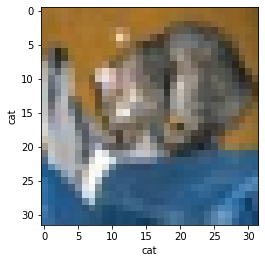

In [28]:
plt.imshow(x_test[0])
plt.xlabel(classes[y_predicted_labels[0]])
plt.ylabel(classes[y_test[0]])

In [29]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[481,  19,  76,  46,  32,  12,  39,  52, 231,  12],
       [ 45, 478,  36,  80,  10,  18,  34,  40, 187,  72],
       [ 48,   8, 379, 128,  91,  63, 172,  76,  32,   3],
       [ 24,  10,  91, 435,  43, 119, 177,  55,  36,  10],
       [ 38,   6, 172,  79, 356,  25, 188, 100,  34,   2],
       [ 17,   4, 112, 284,  48, 287, 122,  80,  42,   4],
       [  1,   6,  71,  99,  69,  23, 686,  22,  20,   3],
       [ 19,   8,  68,  92,  69,  51,  53, 595,  32,  13],
       [ 58,  31,  23,  45,  22,  10,  18,  22, 751,  20],
       [ 46, 119,  21, 118,  11,  27,  53,  97, 177, 331]])>

In [30]:
import seaborn as sns

<AxesSubplot:>

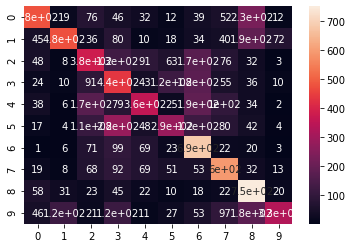

In [31]:
sns.heatmap(cm,annot=True)

In [47]:
cnn = models.Sequential()

In [56]:
cnn_model=models.Sequential()
cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
cnn_model.add(layers.MaxPool2D((2,2)))

cnn_model.add(layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
cnn_model.add(layers.MaxPool2D((2,2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(64,activation='relu'))
cnn_model.add(layers.Dense(10,activation='softmax'))


In [57]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [58]:
y_train[0]

6

In [ ]:
cnn_model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 394s 245ms/step - loss: 1.4700 - accuracy: 0.4714
Epoch 2/10
1563/1563 [==============================] - 293s 188ms/step - loss: 1.1156 - accuracy: 0.6093
Epoch 3/10
1563/1563 [==============================] - 321s 206ms/step - loss: 0.9880 - accuracy: 0.6558
Epoch 4/10
1370/1563 [=========================>....] - ETA: 47s - loss: 0.9023 - accuracy: 0.6900